In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import genfromtxt  
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

### Datasets

In [60]:
def load_iris():
    '''
    Returns a column of all petal lengths.
    '''
    X = genfromtxt("./data/iris.csv", delimiter=',', skip_header=1)
    X = X[:,2]
    X = X.reshape(-1,1)
    return X

def load_bdp():
    '''
    Returns a column of systolic and diastolic blood pressure values.
    '''
    Z = genfromtxt("./data/bdp.csv", delimiter=',', skip_header=1)
    n = Z.shape[0]
    X = np.zeros(2*n)
    X[:n] = Z[:,2]
    X[n:] = Z[:,3]
    X = X.reshape(-1,1)
    return X

def sample(pi, mu, std, n):
    '''
    Returns a column of n values drawn from a normal mixture model.
    
    Parameter
        pi  k mixing coefficients
        mu  k means
        std k standard deviations
        n   number of data points
        
    Return
        n data points randomly sampled from specified mixture. 
    '''
    y = np.random.choice(len(pi), size=n, p=pi)
    x = np.zeros((n,1))
    for i, comp in enumerate(y):
        x[i] = norm.rvs(mu[comp], std[comp])
    return x


### Examples

In [61]:
# generate n points from a mixture of fived normal distributions
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
samp = sample(pi, mu, std, n)

In [62]:
# load petal lengths of iris flowers
iris = load_iris()

In [63]:
# load blood pressures
bdp = load_bdp()

## Distribution of Data

### Iris data

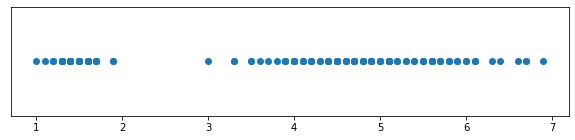

In [64]:
# show data
plt.subplots(figsize=(10,2))
plt.scatter(iris, np.zeros((len(iris),1)))
plt.yticks(())
plt.show()

### Blood preasure data

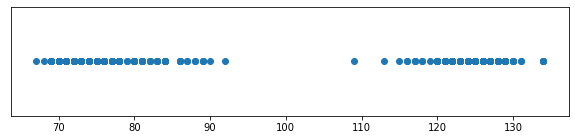

In [65]:
plt.subplots(figsize=(10,2))
plt.scatter(bdp, np.zeros((len(bdp),1)))
plt.yticks(())
plt.show()

### Sample data

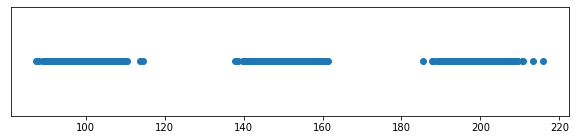

In [66]:
plt.subplots(figsize=(10,2))
plt.scatter(samp, np.zeros((len(samp),1)))
plt.yticks(())
plt.show()

## Iris Dataset


599.1000544698655


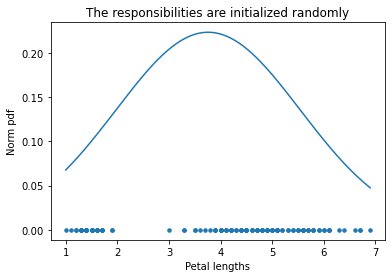

604.9803077859674


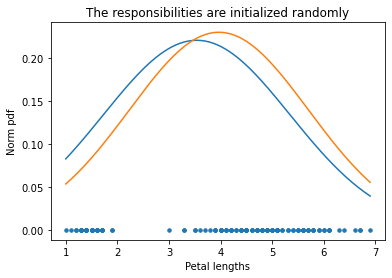

610.9826906463464


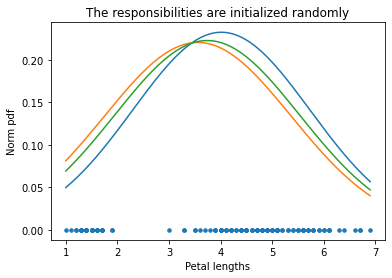

617.0423755390805


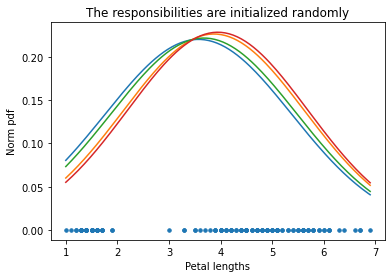

623.028752932137


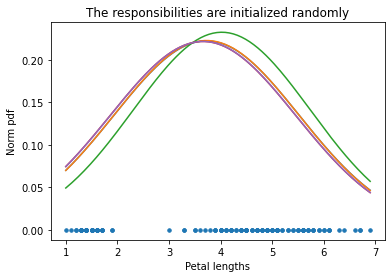

629.0268739786384


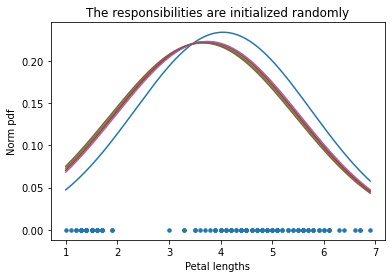

635.0397621096987


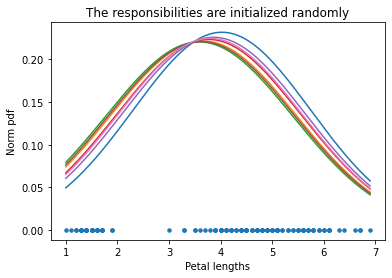

641.0601739967613


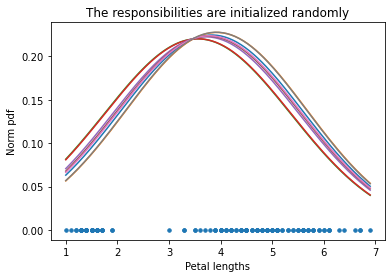

647.0536463550554


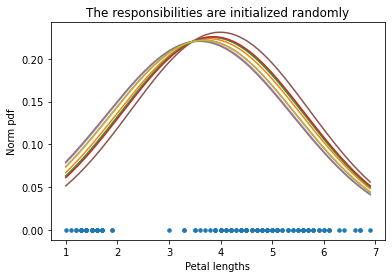

653.0369445217689


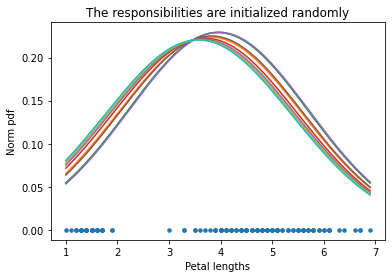

659.0443977111347


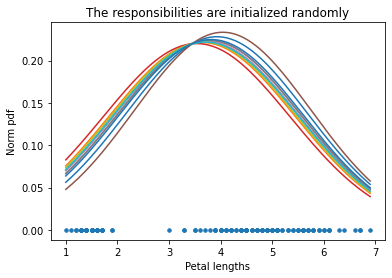

665.0415737349141


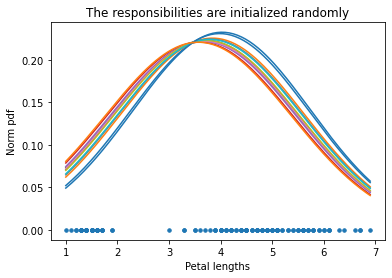

671.0431372158048


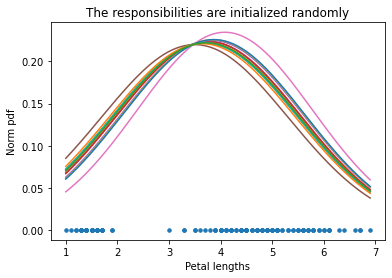

677.0535816476944


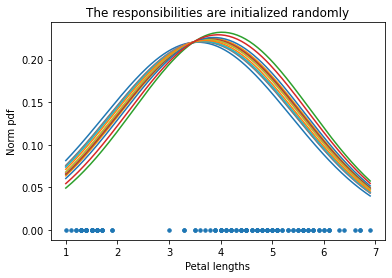

683.0511510530903


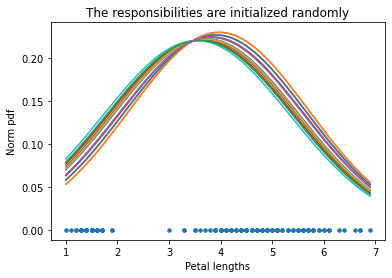

Smallest AIC (Iris): 599.10


In [67]:
iris = load_iris()

aic = []

x_axis = np.linspace(np.min(iris), np.max(iris), iris.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'random', random_state = 42, reg_covar = 1e-1)
    gm.fit(iris)
    aic_iris = gm.aic(iris)
    print(aic_iris)
    aic.append(aic_iris)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(iris, np.zeros((len(iris), 1)), s=12)
    plt.title("The responsibilities are initialized randomly")
    plt.ylabel("Norm pdf")
    plt.xlabel("Petal lengths")
    plt.show();

print(f'Smallest AIC (Iris): {min(aic):.2f}')

Change init_params to kmeans to improve the results of vanilla EM Algorithm:

599.1000544698655


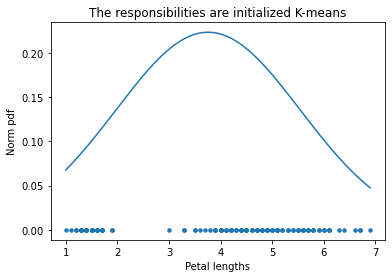

447.3950450504451


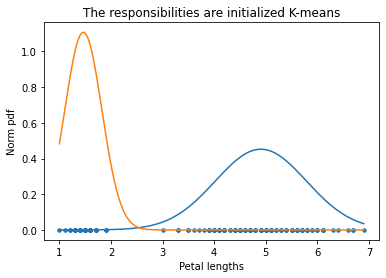

452.4000727473178


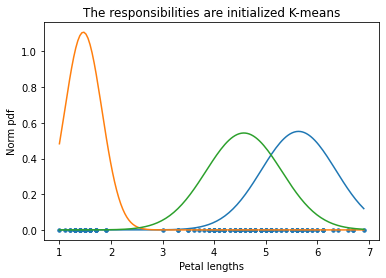

458.34681234292725


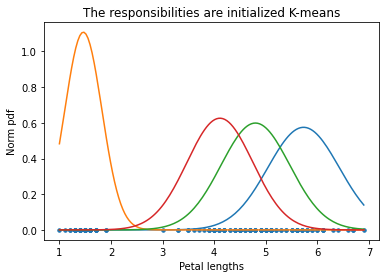

464.1774676764057


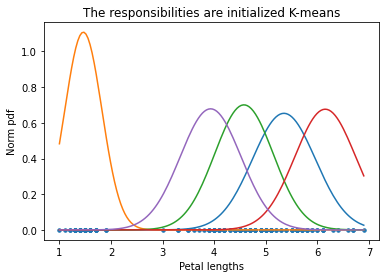

470.0998893806164


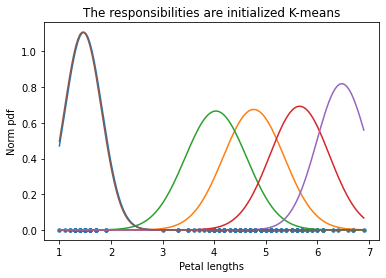

476.0574419288905


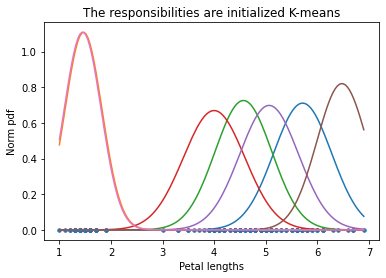

482.0363352837891


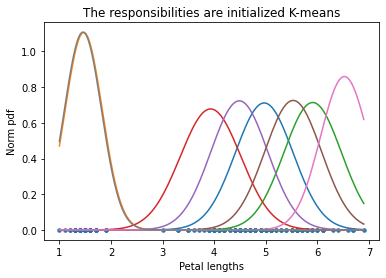

488.011434318406


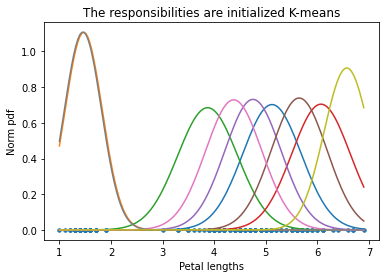

494.00096676273745


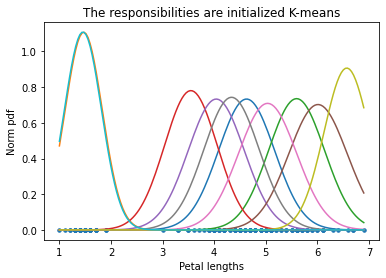

499.99140319403193


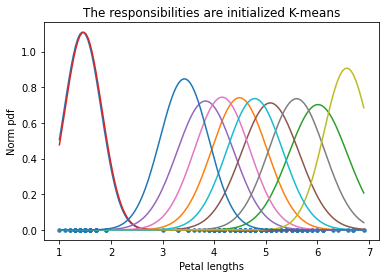

505.9890280666286


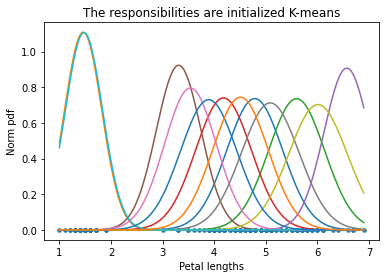

511.99124904850305


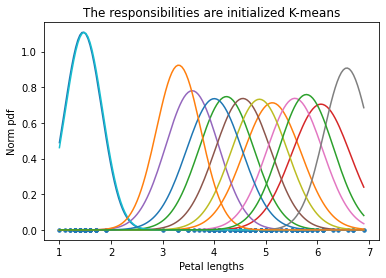

517.9853329228356


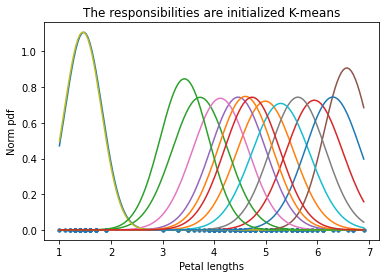

523.9834404858632


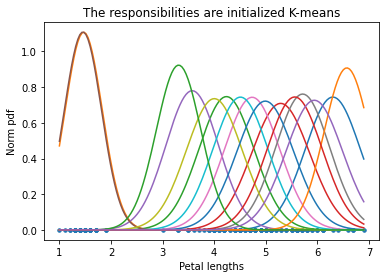

Smallest AIC (Iris): 447.40


In [68]:
iris = load_iris()

aic = []

x_axis = np.linspace(np.min(iris), np.max(iris), iris.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'kmeans', random_state = 42, reg_covar = 1e-1)
    gm.fit(iris)
    aic_iris = gm.aic(iris)
    print(aic_iris)
    aic.append(aic_iris)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(iris, np.zeros((len(iris), 1)), s=12)
    plt.title("The responsibilities are initialized K-means")
    plt.ylabel("Norm pdf")
    plt.xlabel("Petal lengths")
    plt.show();

print(f'Smallest AIC (Iris): {min(aic):.2f}')

## Blood Preasure Dataset

2790.4060203299773


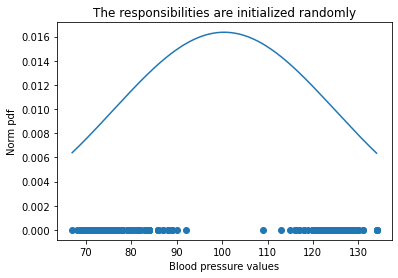

2796.4030854055636


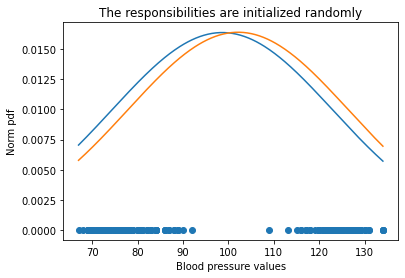

2802.4035491945124


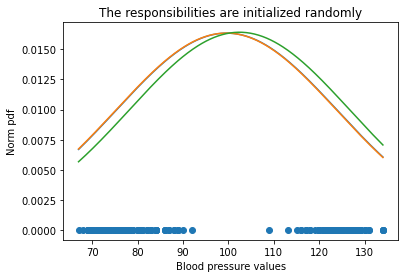

2808.402915418963


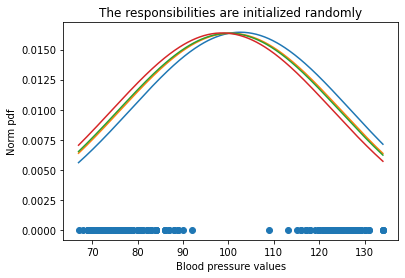

2814.4040759949994


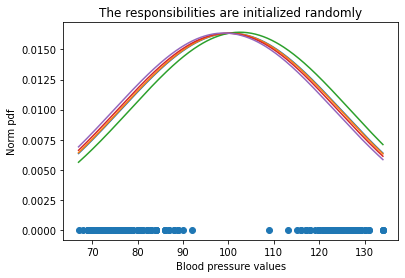

2820.4036133644936


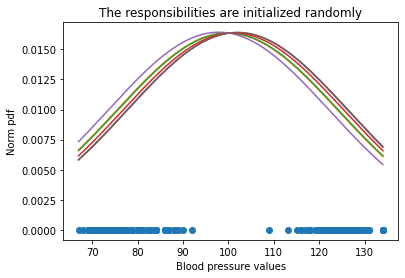

2826.4010395581513


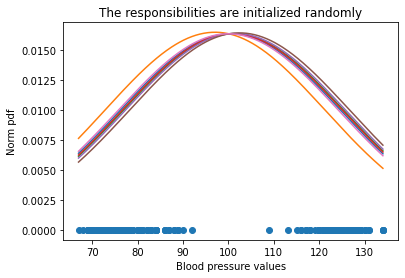

2832.4026691758354


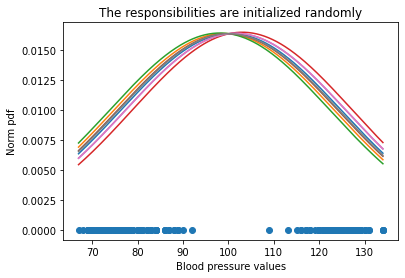

2838.40315223076


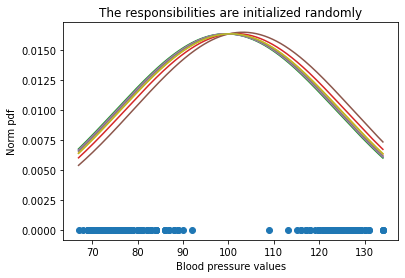

2844.402486903217


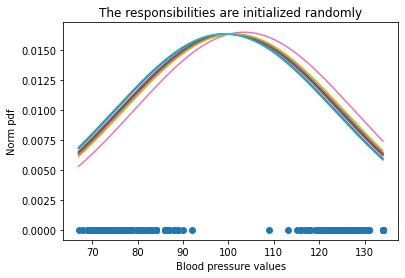

2850.4039586535587


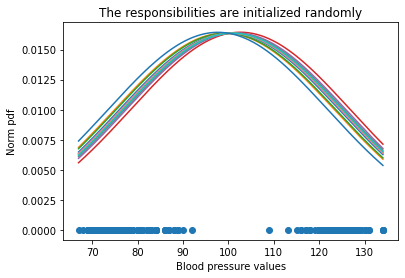

2856.403366597998


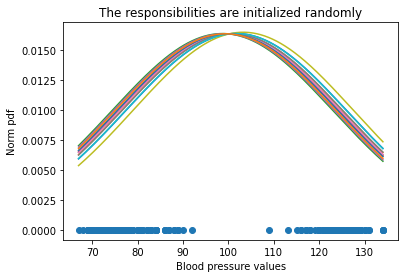

2862.403471371307


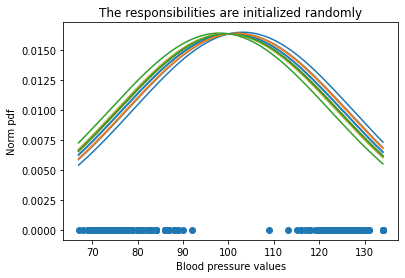

2868.404291067083


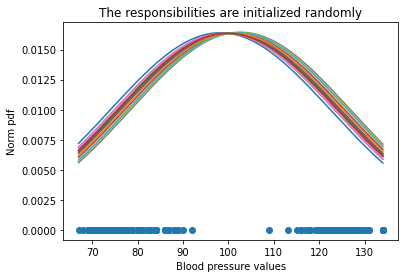

2874.403534749618


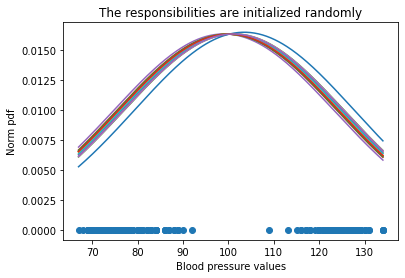

Smallest AIC (BDP): 2790.41


In [69]:
bdp = load_bdp()
aic = []

x_axis = np.linspace(np.min(bdp), np.max(bdp), bdp.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, random_state=32, init_params = 'random', reg_covar = 1e-1)
    gm.fit(bdp)
    aic_bdp = gm.aic(bdp)
    print(aic_bdp)
    aic.append(aic_bdp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(bdp, np.zeros((len(bdp), 1)))
    plt.title("The responsibilities are initialized randomly")
    plt.ylabel("Norm pdf")
    plt.xlabel("Blood pressure values")
    plt.show();
    
print(f'Smallest AIC (BDP): {min(aic):.2f}')

Change init_params to kmeans to improve the results of EM Algorithm:

2790.4060203299773


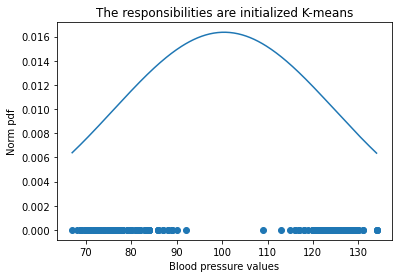

2203.917172852727


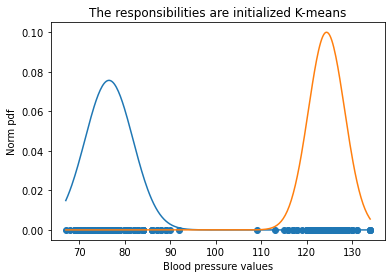

2187.8344972499503


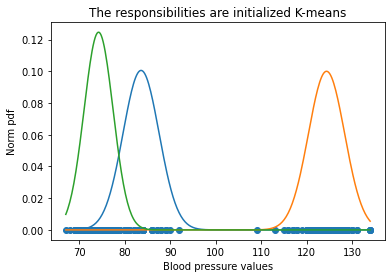

2185.9709377066024


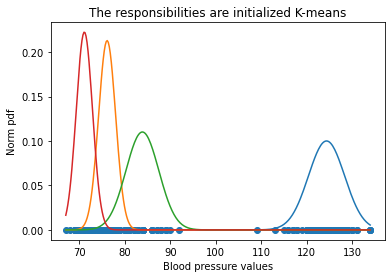

2187.0066674019913


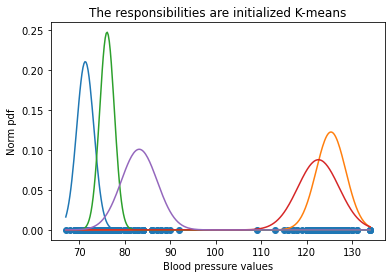

2178.892983770667


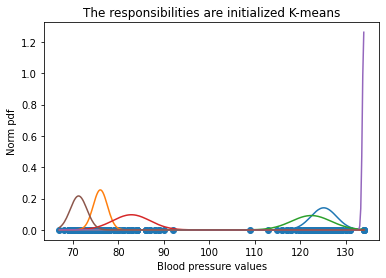

2176.6792926543826


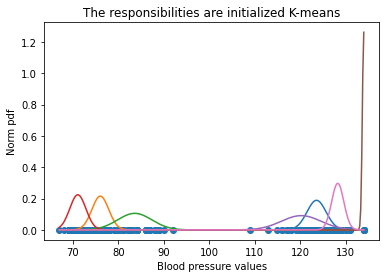

2173.845482434881


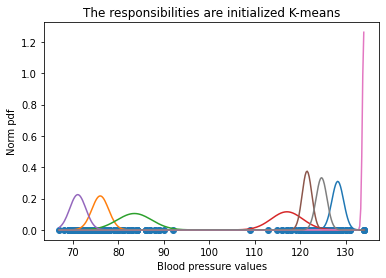

2173.808704606179


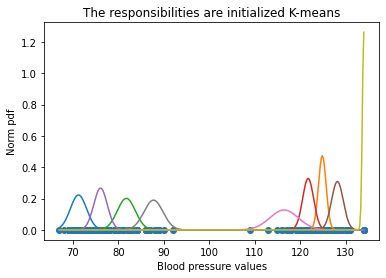

2173.5539446827875


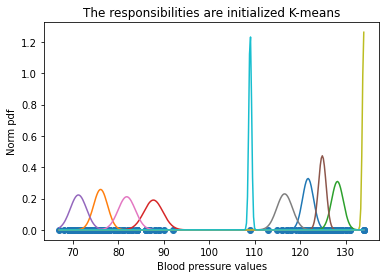

2178.574386192746


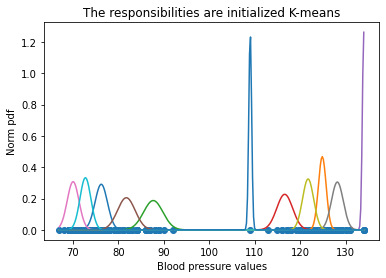

2182.850815787432


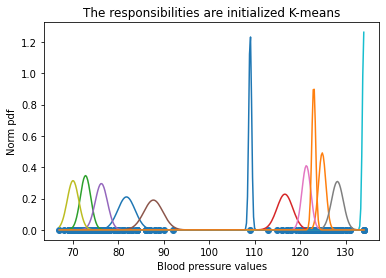

2184.2900222488975


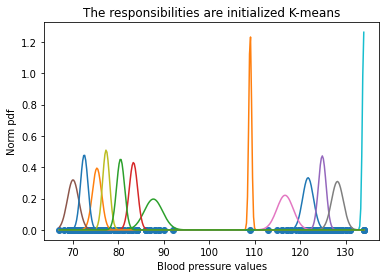

2188.2046537797496


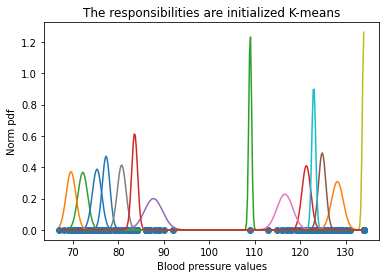

2191.9285321178436


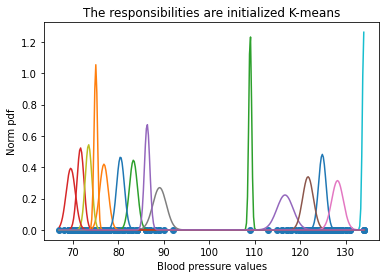

Smallest AIC (BDP): 2173.55


In [70]:
bdp = load_bdp()
aic = []

x_axis = np.linspace(np.min(bdp), np.max(bdp), bdp.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, random_state=32, init_params = 'kmeans', reg_covar = 1e-1)
    gm.fit(bdp)
    aic_bdp = gm.aic(bdp)
    print(aic_bdp)
    aic.append(aic_bdp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(bdp, np.zeros((len(bdp), 1)))
    plt.title("The responsibilities are initialized K-means")
    plt.ylabel("Norm pdf")
    plt.xlabel("Blood pressure values")
    plt.show();
    
print(f'Smallest AIC (BDP): {min(aic):.2f}')

## Sample Dataset

In [71]:
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
samp = sample(pi, mu, std, n)

10276.954870655736


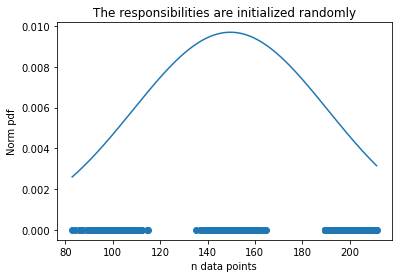

10282.954627608702


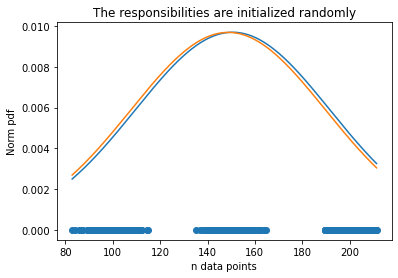

10288.954698937378


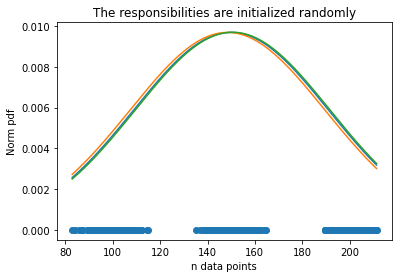

10294.954822383173


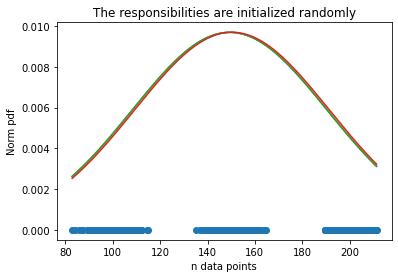

10300.954080202084


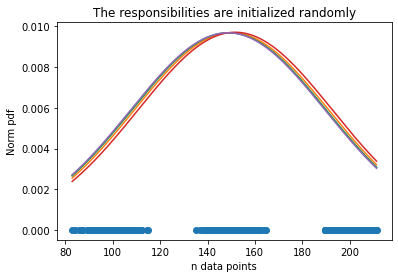

10306.954851567672


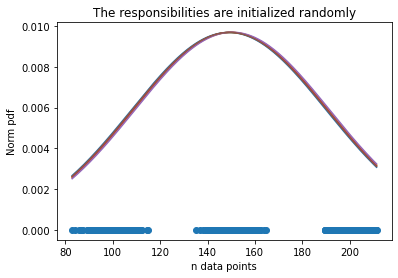

10312.954042697855


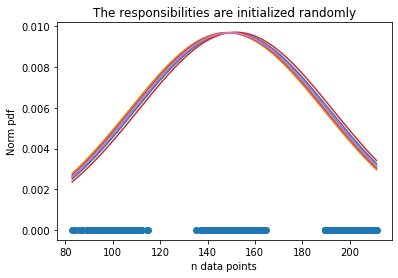

10318.95480467312


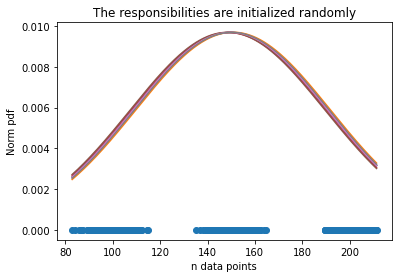

10324.954791587923


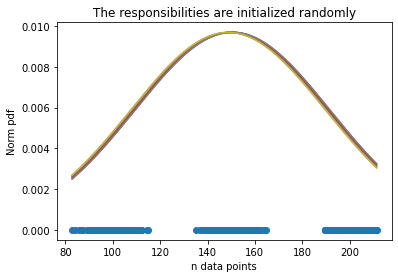

10330.954830196828


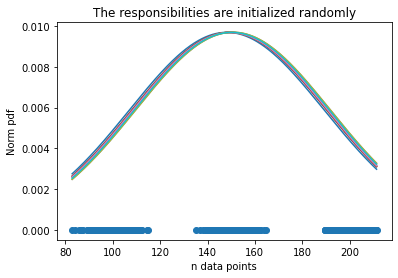

10336.954584537882


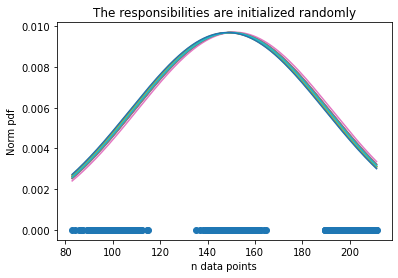

10342.954792305605


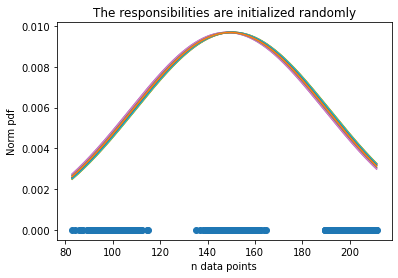

10348.95487807972


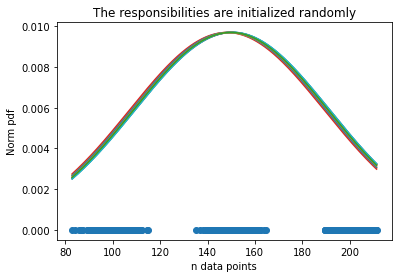

10354.954793393097


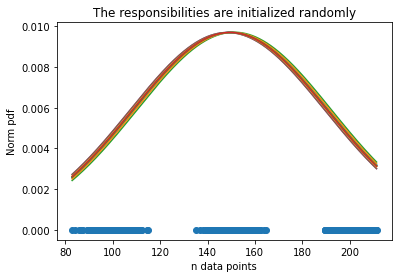

10360.954539037939


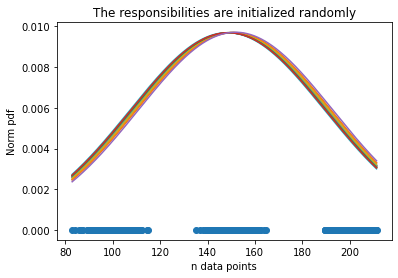

Smallest AIC (Sample): 10276.95


In [72]:
x_axis = np.linspace(np.min(samp), np.max(samp), samp.shape[0])
aic = []

for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'random', random_state = 42, reg_covar = 1e-1)
    gm.fit(samp)
    aic_samp = gm.aic(samp)
    print(aic_samp)
    aic.append(aic_samp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(samp, np.zeros((len(samp), 1)))
    plt.title("The responsibilities are initialized randomly")
    plt.ylabel("Norm pdf")
    plt.xlabel("n data points")
    plt.show();
    
print(f'Smallest AIC (Sample): {min(aic):.2f}')

Change init_params to kmeans to improve the Results of EM Algorithm:

10276.954870655736


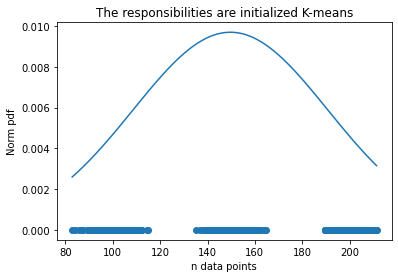

9482.105132847511


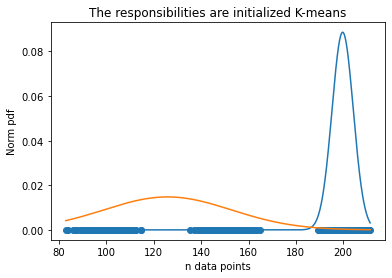

8255.473308801564


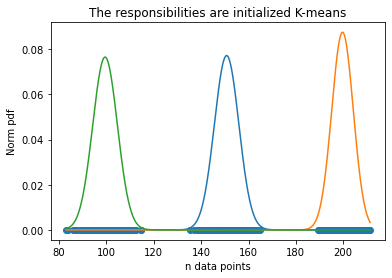

8252.966449293155


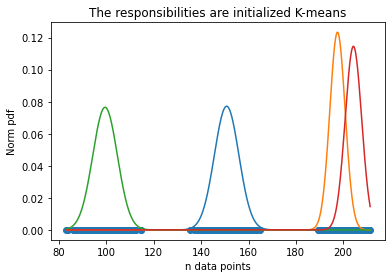

8258.254779271541


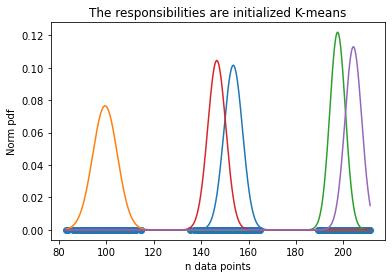

8261.12567030254


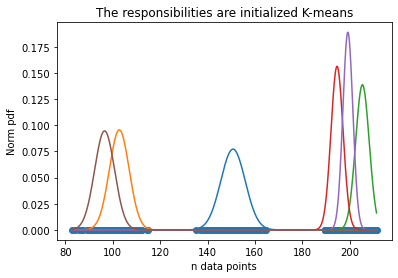

8264.670591572381


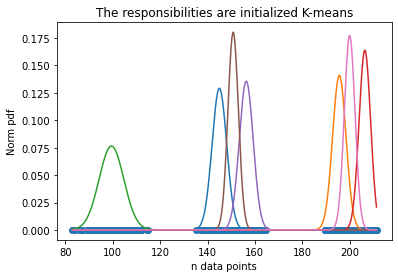

8271.132148898647


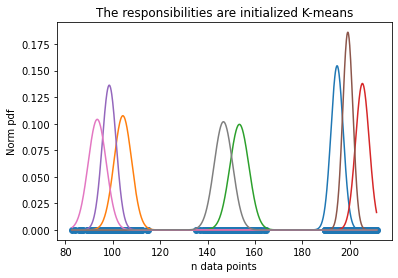

8275.931527492314


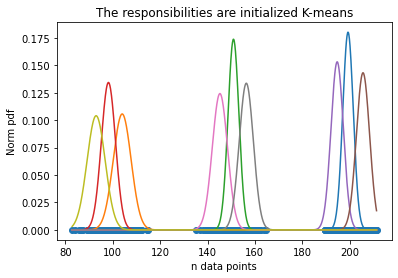

8280.650019532393


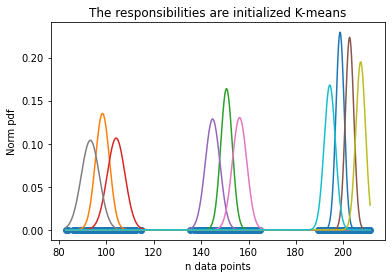

8282.918295570425


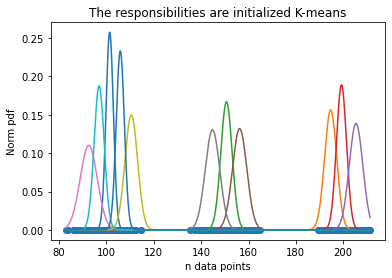

8286.818405136532


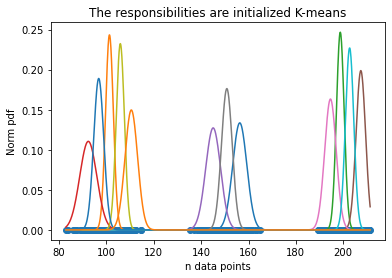

8290.563204039732


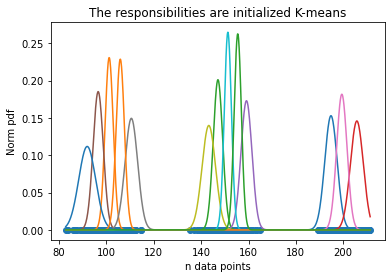

8294.05388561498


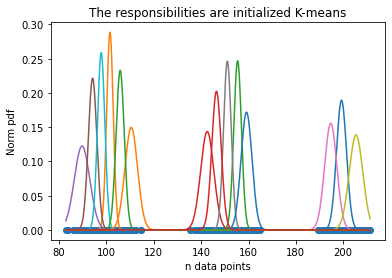

8298.138666700019


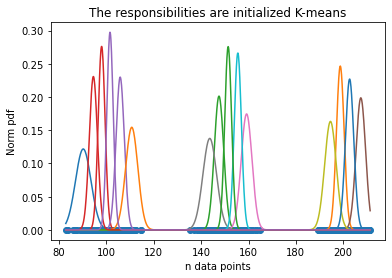

Smallest AIC (Sample): 8252.97


In [73]:
x_axis = np.linspace(np.min(samp), np.max(samp), samp.shape[0])
aic = []

for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'kmeans', random_state = 42, reg_covar = 1e-1)
    gm.fit(samp)
    aic_samp = gm.aic(samp)
    print(aic_samp)
    aic.append(aic_samp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(samp, np.zeros((len(samp), 1)))
    plt.title("The responsibilities are initialized K-means")
    plt.ylabel("Norm pdf")
    plt.xlabel("n data points")
    plt.show();
    
print(f'Smallest AIC (Sample): {min(aic):.2f}')